- Import modules

In [218]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from pandarallel import pandarallel 

from sklearn.utils import shuffle
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 

- Initilize parallel processing module for faster data processing

In [219]:
pandarallel.initialize()

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


- Download NLTK

In [220]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alenvlahovljak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Import both train and test data frames

In [222]:
df_train = pd.read_csv('./tweetTraining.csv', header=None, encoding='ISO-8859-1', names=["id", "date", "user", "text", "tweet_polarity"])
df_test = pd.read_csv('./tweetTraining.csv', header=None, encoding='ISO-8859-1', names=["id", "date", "user", "text", "tweet_polarity"])

- Print train data frame

In [223]:
df_train

,id,date,user,text,tweet_polarity
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...
9995,2184830969,Mon Jun 15 16:29:07 PDT 2009,jfanaian,@annhoff yeah I'm right next to you!,4
9996,2184831004,Mon Jun 15 16:29:08 PDT 2009,mikeyloops,Oh my way to slo,4
9997,2184831055,Mon Jun 15 16:29:08 PDT 2009,FelineRoyalty,"Today is my birthday, I'm 7 years young Mom g...",4
9998,2184831095,Mon Jun 15 16:29:08 PDT 2009,babyd,Internet se cortÃ³ y dejÃ³ de subirse el video...,4


- Print test data frame

In [6]:
df_test

,id,date,user,text,tweet_polarity
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...
9995,2184830969,Mon Jun 15 16:29:07 PDT 2009,jfanaian,@annhoff yeah I'm right next to you!,4
9996,2184831004,Mon Jun 15 16:29:08 PDT 2009,mikeyloops,Oh my way to slo,4
9997,2184831055,Mon Jun 15 16:29:08 PDT 2009,FelineRoyalty,"Today is my birthday, I'm 7 years young Mom g...",4
9998,2184831095,Mon Jun 15 16:29:08 PDT 2009,babyd,Internet se cortÃ³ y dejÃ³ de subirse el video...,4


- Data frames' size

In [156]:
print(df_train.size, df_test.size)

50000 50000


<AxesSubplot:>

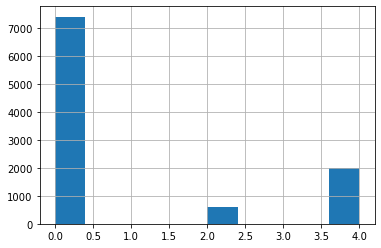

In [232]:
df_train['tweet_polarity'].hist()

<AxesSubplot:>

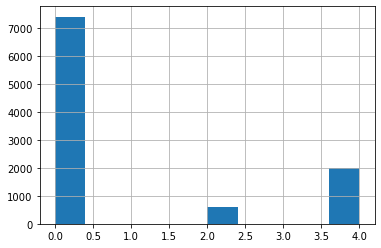

In [233]:
df_test['tweet_polarity'].hist()

- Shuffle both data frames as the're the same 

In [182]:
df_train = shuffle(df_train, random_state=10)
df_test = shuffle(df_train, random_state=10)

In [158]:
df_train

,id,date,user,text,tweet_polarity
8716,2184531124,Mon Jun 15 16:02:47 PDT 2009,Crazycanuckblog,carriegisaac knew,1
2060,2240719080,Fri Jun 19 10:04:53 PDT 2009,danscottbrown,dannisaywh,2
1789,2240572467,Fri Jun 19 09:54:28 PDT 2009,bernadette18,soysauc sorry ur park ticket u didnt plan slee...,2
5431,1469083544,Tue Apr 07 05:08:05 PDT 2009,Belle2gs,get ready rough on work,0
6848,1469583015,Tue Apr 07 06:49:01 PDT 2009,Scotty089,feel sleepy gym nee snap driv mansfield not ev...,0
...,...,...,...,...,...
1718,2240511807,Fri Jun 19 09:50:04 PDT 2009,leewaters,luclatulip ah lik vert real lot stabl lik top ...,2
8704,2184530442,Mon Jun 15 16:02:44 PDT 2009,t3naciously,menopausalmaud gasp loooov garageband song rea...,1
8685,2184529801,Mon Jun 15 16:02:40 PDT 2009,michaelkpeters,watchin rocky,1
3983,1468718845,Tue Apr 07 03:21:07 PDT 2009,phil6395,bought iphon g ebay lik week ago stil com,0


In [159]:
df_test

,id,date,user,text,tweet_polarity
4321,1468792067,Tue Apr 07 03:45:33 PDT 2009,TiffaniDanyelle,deucewt gott meet roy oak styl show got show t...,0
693,1467985185,Mon Apr 06 23:07:24 PDT 2009,niffyat,castillo ugh disconcert,0
5618,1469132984,Tue Apr 07 05:19:56 PDT 2009,Bunchuck,cold,0
2821,1468458804,Tue Apr 07 01:47:48 PDT 2009,mykylnordwind,good morn world got snow,0
7015,1469644019,Tue Apr 07 06:59:52 PDT 2009,absolutjoiz,hungry thirstu badminton eat yet coz first rea...,0
...,...,...,...,...,...
4386,1468813702,Tue Apr 07 03:52:23 PDT 2009,graciie_xo,wash dish boohoo,0
6977,1469636750,Tue Apr 07 06:58:34 PDT 2009,omega29,lack protein clos mon reek havoc body joint ac...,0
5212,1469024119,Tue Apr 07 04:53:12 PDT 2009,Jeni86,friday yet,0
9557,2184738137,Mon Jun 15 16:20:49 PDT 2009,The_PHP_Jedi,lyoko cool yeah back surgery spec proc cal spi...,1


- Check for unique values

In [183]:
df_train['tweet_polarity'].unique()

array([0, 4, 2])

In [184]:
df_test['tweet_polarity'].unique()

array([4, 2, 0])

In [185]:
def text_cleaning(text):
    review = re.sub('[^a-zA-Z]',' ', text) 
    review = review.lower()
    review = review.split()
    
    ps = LancasterStemmer()
    
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    
    return ' '.join(review)

In [186]:
df_train['text'] = df_train['text'].parallel_apply(lambda x: text_cleaning(x))
df_train

,id,date,user,text,tweet_polarity
937,1468041919,Mon Apr 06 23:24:31 PDT 2009,gi_gi_bee,rumlov empty rum barrel sad rum barrel shak he...,0
9355,2184692544,Mon Jun 15 16:16:46 PDT 2009,wagylove,justo lol yup yup leav da sloppy on,4
2293,2240831834,Fri Jun 19 10:12:57 PDT 2009,kasumelissa,linst room swallow ipod cabl,2
192,1467859820,Mon Apr 06 22:32:36 PDT 2009,msbutt3rfly14,spent not good guy,0
8675,2184509974,Mon Jun 15 16:00:56 PDT 2009,bitofmomsense,paintermommy ou think don simil would cool nic...,4
...,...,...,...,...,...
9372,2184693508,Mon Jun 15 16:16:52 PDT 2009,mediatemple,bio comprom mad sec mail serv us account vuln ...,4
7291,1469755923,Tue Apr 07 07:19:34 PDT 2009,Jodi1982,anybody els sad dr kutn,0
1344,1468133212,Mon Apr 06 23:53:53 PDT 2009,paul_steele,pleas watch vid tel not mov http www youtub co...,0
7293,1469756325,Tue Apr 07 07:19:39 PDT 2009,musicallymary,know busy law test took not look forward quant...,0


In [187]:
df_test['text'] = df_test['text'].parallel_apply(lambda x: text_cleaning(x))
df_test

,id,date,user,text,tweet_polarity
8716,2184531124,Mon Jun 15 16:02:47 PDT 2009,Crazycanuckblog,carriegisaac knew,4
2060,2240719080,Fri Jun 19 10:04:53 PDT 2009,danscottbrown,dannisaywh,2
1789,2240572467,Fri Jun 19 09:54:28 PDT 2009,bernadette18,soysauc sorry ur park ticket u didnt plan slee...,2
5431,1469083544,Tue Apr 07 05:08:05 PDT 2009,Belle2gs,get ready rough on work,0
6848,1469583015,Tue Apr 07 06:49:01 PDT 2009,Scotty089,feel sleepy gym nee snap driv mansfield not ev...,0
...,...,...,...,...,...
1718,2240511807,Fri Jun 19 09:50:04 PDT 2009,leewaters,luclatulip ah lik vert real lot stabl lik top ...,2
8704,2184530442,Mon Jun 15 16:02:44 PDT 2009,t3naciously,menopausalmaud gasp loooov garageband song rea...,4
8685,2184529801,Mon Jun 15 16:02:40 PDT 2009,michaelkpeters,watchin rocky,4
3983,1468718845,Tue Apr 07 03:21:07 PDT 2009,phil6395,bought iphon g ebay lik week ago stil com,0


Encode <code>tweet_polarity</code>

In [188]:
# 0 = negative
# 2 = neutral 
# 4 = positive

tweet_polarity_encode = {
    0: 0, 
    4: 1, 
    2: 2
}

In [238]:
df_train['tweet_polarity'] = df_train['tweet_polarity'].map(tweet_polarity_encode)

df_train.head()

,id,date,user,text,tweet_polarity
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [239]:
df_test['tweet_polarity'] = df_test['tweet_polarity'].map(tweet_polarity_encode)

df_test.head()

,id,date,user,text,tweet_polarity
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


- Declare train and test variables

<AxesSubplot:>

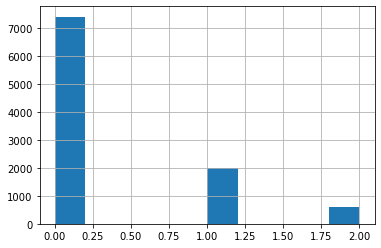

In [240]:
df_test['tweet_polarity'].hist()

<AxesSubplot:>

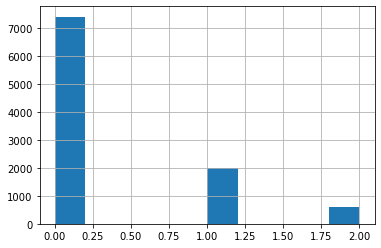

In [241]:
df_test['tweet_polarity'].hist()

In [191]:
X_train = df_train['text']
y_train = df_train['tweet_polarity']

In [192]:
X_test = df_test['text']
y_test = df_test['tweet_polarity']

- Model evaluation function (cross validation, k=5)

In [193]:
def evaluation(model, X_test,  y_test):
    y_pred = model.predict(X_test)
    
    scores = cross_val_score(model, X_test, y_test, cv = 5)
    
    print(scores.mean())
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

- Create TD IDF vectorizer object (transforms the text into a usable vector)

In [194]:
vectorizer = TfidfVectorizer(max_features = 500)

- Fit vectorizer to the training data and transform it into <code>X_train_tf</code>

In [195]:
X_train_tf = vectorizer.fit_transform(X_train)

- Fit vectorizer to the training data and transform it into <code>X_test_tf</code>

In [196]:
X_test_tf = vectorizer.fit_transform(X_test)

In [197]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train_tf, y_train)

y_pred_dtc = dtc.predict(X_test_tf)

- Evaluate trained model (with cross-validation)

In [198]:
evaluation(dtc, X_test_tf, y_test)

0.6922
0.69 accuracy with a standard deviation of 0.01


- Get the accuaracy score 

In [129]:
accuracy_score(y_test, y_pred_dtc)

0.9701

- Get the class labels predictions

In [121]:
P_train = dtc.predict(X_train_tf)
P_test = dtc.predict(X_test_tf)

- Call the confusion matrix function

In [199]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

array([[0.99581081, 0.00418919, 0.        ],
       [0.095     , 0.905     , 0.        ],
       [0.11333333, 0.01666667, 0.87      ]])

- Plot the confusion matrix

Text(33.0, 0.5, 'Target')

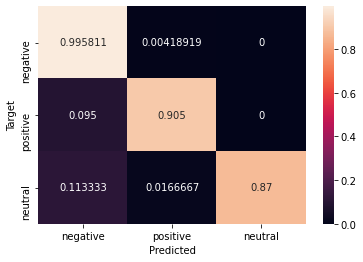

In [200]:
classes = ['negative', 'positive', 'neutral'] 

df_cm = pd.DataFrame(cm, index=classes, columns=classes)

ax = sns.heatmap(df_cm, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

- Model does very well on all clases
- When we do not predict the neutral class corectly, we actually predict negative rather than positive

- Call the confusion matrix function for test subset

In [201]:
cm_test = confusion_matrix(y_test, P_test, normalize='true')
cm_test

array([[0.99581081, 0.00418919, 0.        ],
       [0.095     , 0.905     , 0.        ],
       [0.11333333, 0.01666667, 0.87      ]])

- Plot the confusion matrix for test subset

Text(33.0, 0.5, 'Target')

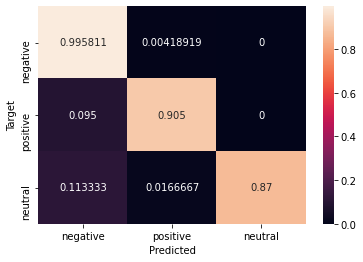

In [202]:
classes = ['negative', 'positive', 'neutral'] 

df_cm_test = pd.DataFrame(cm_test, index=classes, columns=classes)

ax = sns.heatmap(df_cm_test, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

<p style='color:red'>Test matrix is the same as the training matrix</p>

- Print classification report

In [147]:
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7400
           1       0.98      0.91      0.94      2000
           2       1.00      0.87      0.93       600

    accuracy                           0.97     10000
   macro avg       0.98      0.92      0.95     10000
weighted avg       0.97      0.97      0.97     10000



<h3>Train model without neutral class</h3>

- Filter the rows with the <code>tweet_polarity</code> equal to 2

In [205]:
df_b_train = df_train[df_train['tweet_polarity'] != 2]
df_b_test = df_test[df_test['tweet_polarity'] != 2]

print("Number of neutral tweet_polarity:", df_b_train.query('tweet_polarity == "2"')['tweet_polarity'].count())
print("Number of neutral tweet_polarity:", df_b_test.query('tweet_polarity == "2"')['tweet_polarity'].count())

Number of neutral tweet_polarity: 0
Number of neutral tweet_polarity: 0


In [209]:
df_b_train.tail()

,id,date,user,text,tweet_polarity
9372,2184693508,Mon Jun 15 16:16:52 PDT 2009,mediatemple,bio comprom mad sec mail serv us account vuln ...,1
7291,1469755923,Tue Apr 07 07:19:34 PDT 2009,Jodi1982,anybody els sad dr kutn,0
1344,1468133212,Mon Apr 06 23:53:53 PDT 2009,paul_steele,pleas watch vid tel not mov http www youtub co...,0
7293,1469756325,Tue Apr 07 07:19:39 PDT 2009,musicallymary,know busy law test took not look forward quant...,0
1289,1468123355,Mon Apr 06 23:50:30 PDT 2009,albynomonk,heatherlibby oh wel seem lik troubl christian ...,0


In [208]:
df_b_test.tail()

,id,date,user,text,tweet_polarity
8493,2184481604,Mon Jun 15 15:58:34 PDT 2009,PandemicStudios,dvx uk ea pandem not mad annount regard new me...,1
8704,2184530442,Mon Jun 15 16:02:44 PDT 2009,t3naciously,menopausalmaud gasp loooov garageband song rea...,1
8685,2184529801,Mon Jun 15 16:02:40 PDT 2009,michaelkpeters,watchin rocky,1
3983,1468718845,Tue Apr 07 03:21:07 PDT 2009,phil6395,bought iphon g ebay lik week ago stil com,0
8590,2184505676,Mon Jun 15 16:00:35 PDT 2009,magneversaydie,nelaw jaj eso hic,1


- Convert dataset into TD IDF vectorizer object

In [211]:
X_train_b = vectorizer.fit_transform(df_b_train["text"])
X_test_b = vectorizer.fit_transform(df_b_test["text"])

- Get the <code>tweet_polarity</code> classes and obtain Y_train_b and Y_test_b

In [224]:
Y_train_b = df_b_train['tweet_polarity']
Y_test_b = df_b_test['tweet_polarity']

- Train a new model on binary dataset

In [225]:
dtc_b = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train_b, Y_train_b)

y_pred_dtc = dtc.predict(X_test_b)

- Print accuaracy score

In [226]:
print("Train acc:", dtc.score(X_train_b, Y_train_b))
print("Test acc:", dtc.score(X_test_b, Y_test_b))

Train acc: 0.9767021276595744
Test acc: 0.9767021276595744


- Get class labels

In [228]:
P_train_b = dtc.predict(X_train_b)
P_test_b = dtc.predict(X_test_b)

In [230]:
cm_test_b = confusion_matrix(Y_test_b, P_test_b, normalize='true')
cm_test_b

array([[0.99608108, 0.00391892],
       [0.095     , 0.905     ]])

Text(33.0, 0.5, 'Target')

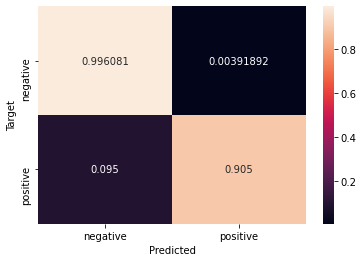

In [231]:
classes = ['negative', 'positive'] 

df_cm_test = pd.DataFrame(cm_test_b, index=classes, columns=classes)

ax = sns.heatmap(df_cm_test, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")